In [ ]:
import zipfile
import os
import pandas as pd
import shutil
import matplotlib
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg
import numpy as np
import random
import imageio
from IPython.display import Image
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/fyp/train-5822.csv")
train = train.drop("Unnamed: 0",1)
train

,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,pe_present_on_image,negative_exam_for_pe,qa_motion,qa_contrast,flow_artifact,rv_lv_ratio_gte_1,rv_lv_ratio_lt_1,leftsided_pe,chronic_pe,true_filling_defect_not_pe,rightsided_pe,acute_and_chronic_pe,central_pe,indeterminate
0,6897fa9de148,2bfbb7fd2e8b,c0f3cb036d06,0,0,0,0,0,0,1,1,0,0,1,0,0,0
1,6897fa9de148,2bfbb7fd2e8b,f57ffd3883b6,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,6897fa9de148,2bfbb7fd2e8b,41220fda34a3,0,0,0,0,0,0,1,1,0,0,1,0,0,0
3,6897fa9de148,2bfbb7fd2e8b,13b685b4b14f,0,0,0,0,0,0,1,1,0,0,1,0,0,0
4,6897fa9de148,2bfbb7fd2e8b,be0b7524ffb4,0,0,0,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431327,4833c9b6a5d0,57e3e3c5f910,da0ecef50cf5,0,0,0,0,0,0,1,1,1,0,0,0,0,0
1431328,4833c9b6a5d0,57e3e3c5f910,d74b46c2f2c4,0,0,0,0,0,0,1,1,1,0,0,0,0,0
1431329,4833c9b6a5d0,57e3e3c5f910,ba71189191ad,0,0,0,0,0,0,1,1,1,0,0,0,0,0
1431330,4833c9b6a5d0,57e3e3c5f910,f4fdc88f2ace,0,0,0,0,0,0,1,1,1,0,0,0,0,0


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/fyp/test-1457.csv")
test = test.drop("Unnamed: 0",1)
test

,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,pe_present_on_image,negative_exam_for_pe,qa_motion,qa_contrast,flow_artifact,rv_lv_ratio_gte_1,rv_lv_ratio_lt_1,leftsided_pe,chronic_pe,true_filling_defect_not_pe,rightsided_pe,acute_and_chronic_pe,central_pe,indeterminate
0,57f735b10b3c,80e33d285534,7a0b61bcdae1,0,0,0,0,0,0,1,1,0,0,1,0,0,0
1,57f735b10b3c,80e33d285534,6dfd1c52ed5a,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,57f735b10b3c,80e33d285534,274470e2b18c,0,0,0,0,0,0,1,1,0,0,1,0,0,0
3,57f735b10b3c,80e33d285534,69164c3cf77b,0,0,0,0,0,0,1,1,0,0,1,0,0,0
4,57f735b10b3c,80e33d285534,dafaa7f6626c,0,0,0,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359257,7f54ea06b8bc,0ec029a94ea9,3aa5861466b4,0,0,0,0,0,0,1,1,0,0,1,0,0,0
359258,7f54ea06b8bc,0ec029a94ea9,b1378ac518dc,0,0,0,0,0,0,1,1,0,0,1,0,0,0
359259,7f54ea06b8bc,0ec029a94ea9,059f97fd4597,0,0,0,0,0,0,1,1,0,0,1,0,0,0
359260,7f54ea06b8bc,0ec029a94ea9,ce8f7de8bebe,0,0,0,0,0,0,1,1,0,0,1,0,0,0


In [ ]:
print(train.shape)
print(test.shape)

(1431332, 17)
(359262, 17)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431332 entries, 0 to 1431331
Data columns (total 17 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   StudyInstanceUID            1431332 non-null  object
 1   SeriesInstanceUID           1431332 non-null  object
 2   SOPInstanceUID              1431332 non-null  object
 3   pe_present_on_image         1431332 non-null  int64 
 4   negative_exam_for_pe        1431332 non-null  int64 
 5   qa_motion                   1431332 non-null  int64 
 6   qa_contrast                 1431332 non-null  int64 
 7   flow_artifact               1431332 non-null  int64 
 8   rv_lv_ratio_gte_1           1431332 non-null  int64 
 9   rv_lv_ratio_lt_1            1431332 non-null  int64 
 10  leftsided_pe                1431332 non-null  int64 
 11  chronic_pe                  1431332 non-null  int64 
 12  true_filling_defect_not_pe  1431332 non-null  int64 
 13  rightsided_p

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359262 entries, 0 to 359261
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   StudyInstanceUID            359262 non-null  object
 1   SeriesInstanceUID           359262 non-null  object
 2   SOPInstanceUID              359262 non-null  object
 3   pe_present_on_image         359262 non-null  int64 
 4   negative_exam_for_pe        359262 non-null  int64 
 5   qa_motion                   359262 non-null  int64 
 6   qa_contrast                 359262 non-null  int64 
 7   flow_artifact               359262 non-null  int64 
 8   rv_lv_ratio_gte_1           359262 non-null  int64 
 9   rv_lv_ratio_lt_1            359262 non-null  int64 
 10  leftsided_pe                359262 non-null  int64 
 11  chronic_pe                  359262 non-null  int64 
 12  true_filling_defect_not_pe  359262 non-null  int64 
 13  rightsided_pe               3

In [ ]:
len(pd.unique(train['StudyInstanceUID']))

5822

In [ ]:
len(pd.unique(test['StudyInstanceUID']))

1457

In [ ]:
print('Null values in train data:',train.isnull().sum().sum())
print('Null values in test data:',test.isnull().sum().sum())

Null values in train data: 0
Null values in test data: 0


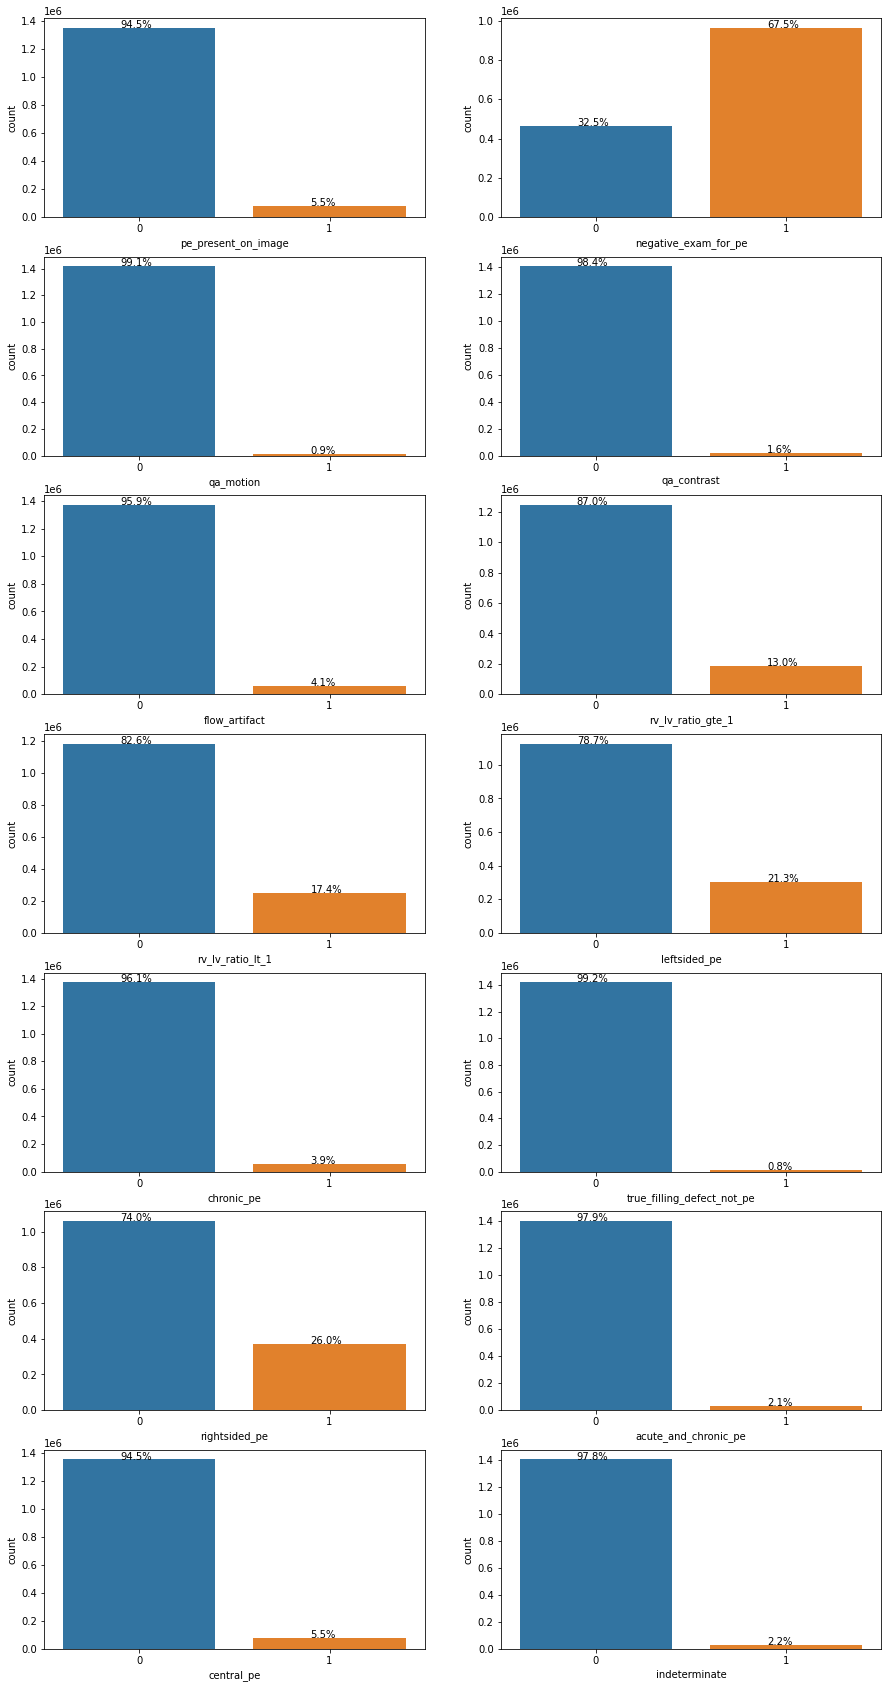

In [ ]:
data = train[[
    'pe_present_on_image', 'negative_exam_for_pe', 'qa_motion', 
    'qa_contrast', 'flow_artifact', 'rv_lv_ratio_gte_1', 
    'rv_lv_ratio_lt_1', 'leftsided_pe', 'chronic_pe', 
    'true_filling_defect_not_pe', 'rightsided_pe', 
    'acute_and_chronic_pe', 'central_pe', 'indeterminate'
]]

total = float(len(data))
fig, ax = plt.subplots(7,2,figsize=(15,30))
for i,col in enumerate(data.columns): 
    plt.subplot(7,2,i+1)
    a = sns.countplot(data[col])
    for p in a.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      a.annotate(percentage, (x-0.5, y))

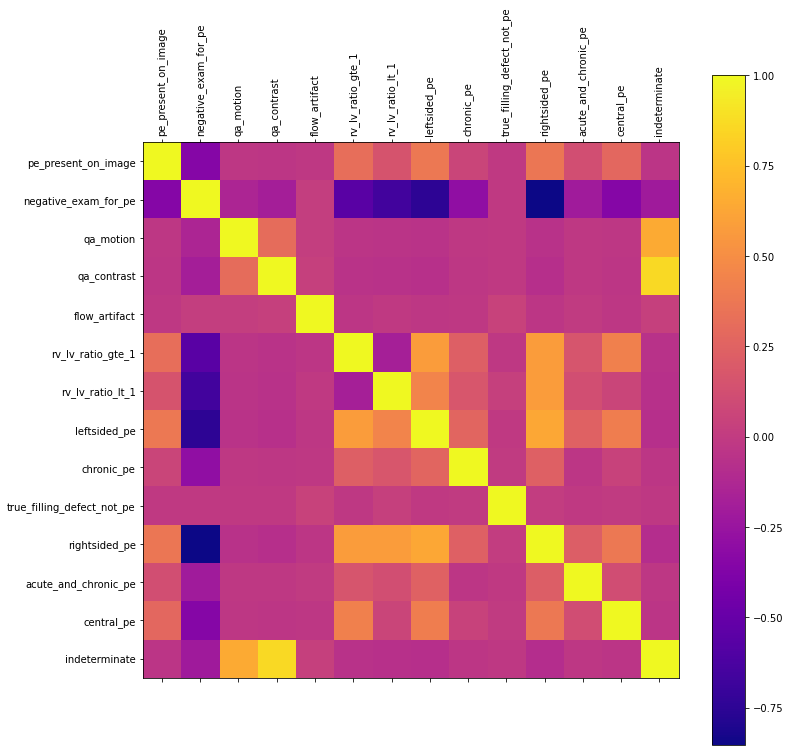

In [ ]:
data = train[[
    'pe_present_on_image', 'negative_exam_for_pe', 'qa_motion', 
    'qa_contrast', 'flow_artifact', 'rv_lv_ratio_gte_1', 
    'rv_lv_ratio_lt_1', 'leftsided_pe', 'chronic_pe', 
    'true_filling_defect_not_pe', 'rightsided_pe', 
    'acute_and_chronic_pe', 'central_pe', 'indeterminate'
]]

f = plt.figure(figsize=(12, 12))
plt.matshow(data.corr(), fignum=f.number, cmap='plasma')
plt.xticks(range(data.shape[1]), data.columns, fontsize=10, rotation=90)
plt.yticks(range(data.shape[1]), data.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

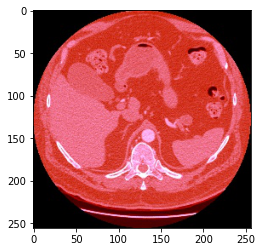

image shape:
(256, 256, 3)


In [ ]:
img = mpimg.imread('/content/test-jpegs/010f10503133/0fb5dd84a89d/0004_cb80304fc651.bmp')
imgplot = plt.imshow(img)
plt.show()
print('image shape:')
print(img.shape)

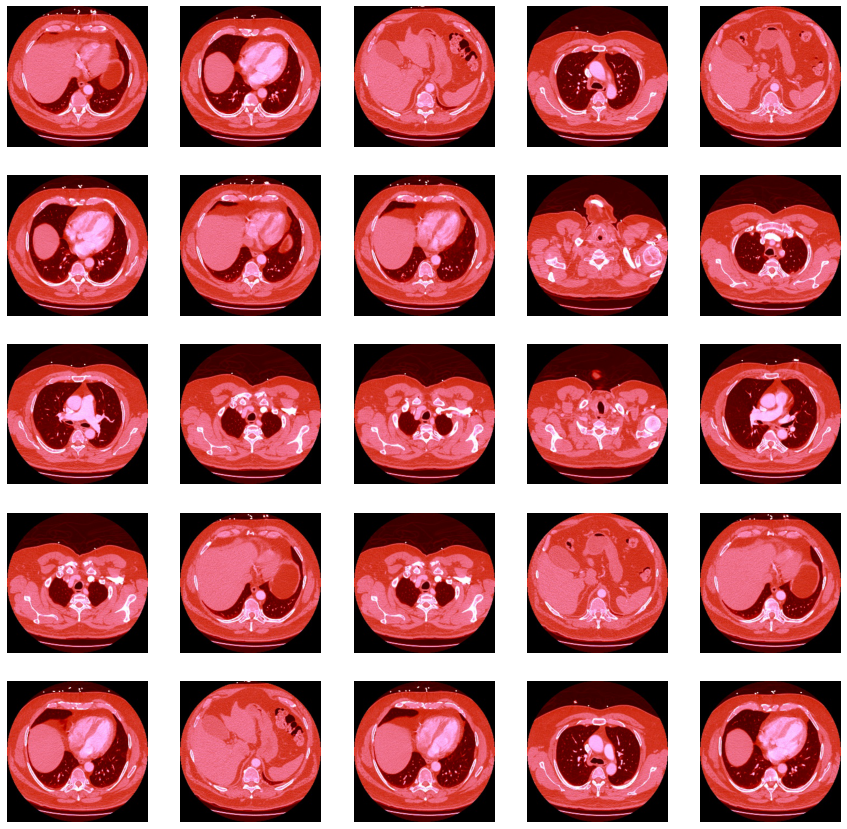

In [ ]:
path = '/content/test-jpegs/010f10503133/0fb5dd84a89d'
f, plots = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(15, 15))

for i in range(25):
    plots[i // 5, i % 5].axis('off')
    plots[i // 5, i % 5].imshow(mpimg.imread(os.path.join(path, random.choice(os.listdir(path)))))

In [ ]:
path = '/content/test-bmp/010f10503133/0fb5dd84a89d'
images = []

for filename in sorted(os.listdir(path)):
        img = mpimg.imread(os.path.join(path,filename))
        if img is not None:
            images.append(img)

imageio.mimsave('/content/scan-animation.gif', images)
Image(filename='/content/scan-animation.gif', format='png')